<a href="https://colab.research.google.com/github/DavidSenseman/BIO1173/blob/main/ResNet101_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------
**COPYRIGHT NOTICE:** This Jupyterlab Notebook is a Derivative work of [Jeff Heaton](https://github.com/jeffheaton) licensed under the Apache License, Version 2.0 (the "License"); You may not use this file except in compliance with the License. You may obtain a copy of the License at

> [http://www.apache.org/licenses/LICENSE-2.0](http://www.apache.org/licenses/LICENSE-2.0)

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

------------------------

# **BIO 1173: Intro Computational Biology**

##### **Module 3: Convolutional Neural Networks (CNN's)**

* Instructor: [David Senseman](mailto:David.Senseman@utsa.edu), [Department of Biology, Health and the Environment](https://sciences.utsa.edu/bhe/), [UTSA](https://www.utsa.edu/)

### Module 3 Material

* Part 3.1: Using Convolutional Neural Networks
* **Part 3.2: Using Pre-Trained Neural Networks with Keras**
* Part 3.3: Facial Recognition and Analysis
* Part 3.4: Introduction to GAN's for Image and Data Generation

#### **Change your Runtime Now!**

For this lesson you must have a GPU hardware accelerator (e.g. `A100`).

## Google CoLab Instructions

You MUST run the following code cell to get credit for this class lesson. By running this code cell, you will map your GDrive to /content/drive and print out your Google GMAIL address. Your Instructor will use your GMAIL address to verify the author of this class lesson.

In [ ]:
# You must run this cell first
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    from google.colab import auth
    auth.authenticate_user()
    Colab = True
    print("Note: Using Google CoLab")
    import requests
    gcloud_token = !gcloud auth print-access-token
    gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
    print(gcloud_tokeninfo['email'])
except:
    print("**WARNING**: Your GMAIL address was **not** printed in the output below.")
    print("**WARNING**: You will NOT receive credit for this lesson.")
    Colab = False

Mounted at /content/drive
Note: Using Google CoLab
david.senseman@gmail.com


### Create Custom Function

The cell below creates a custom function called `hms_string()`. This function is needed to record the time required to train your neural network model.

If you fail to run this cell now, you will receive one (or more) error message(s) later in this lesson.

In [ ]:
# Create custom function

# ------------------------------------------------------------------------
# 0️⃣  Create hms_string()
# ------------------------------------------------------------------------

# Simple function to print out elasped time
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)

### Download`ResNet101`

In [ ]:
# Download ResNet101

import tensorflow.keras
from tensorflow.keras.applications import ResNet101

ResNet101_model_512 = ResNet101(weights='imagenet',include_top=True)

179648224/179648224 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
# Install Keras package

!pip install keras_preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.0 MB/s eta 0:00:00


### **Set ENVIRONMENTAL VARIABLES**



In [ ]:
# Set ENVIRONMENTAL VARIABLES

import os

# ------------------------------------------------------------------------
# 1️⃣  Create variables for downloading loading Zip file
# ------------------------------------------------------------------------
URL = "https://biologicslab.co/BIO1173/data/"
DOWNLOAD_SOURCE = URL+"diabetic_retinopathy_train_512.zip"
DOWNLOAD_NAME = DOWNLOAD_SOURCE[DOWNLOAD_SOURCE.rfind('/')+1:]
print("DOWNLOAD_SOURCE=",DOWNLOAD_SOURCE)
print("DOWNLOAD_NAME=",DOWNLOAD_NAME)

# ------------------------------------------------------------------------
# 2️⃣  Create variables for extracting the Zip file
# ------------------------------------------------------------------------
PATH = "./"
EXTRACT_TARGET = os.path.join(PATH,"retinopathy_512")
SOURCE = os.path.join(EXTRACT_TARGET, "train_512")
print("EXTRACT_TARGET=",EXTRACT_TARGET)
print("SOURCE=",SOURCE)

# ------------------------------------------------------------------------
# 3️⃣  Print variables for debugging
# ------------------------------------------------------------------------
print("ENVIRONMENTAL VARIABLES were successfully created.")

DOWNLOAD_SOURCE= https://biologicslab.co/BIO1173/data/diabetic_retinopathy_train_512.zip
DOWNLOAD_NAME= diabetic_retinopathy_train_512.zip
EXTRACT_TARGET= ./retinopathy_512
SOURCE= ./retinopathy_512/train_512
ENVIRONMENTAL VARIABLES were successfully created.


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_2_image37C.png)

### **Download and Extract Image Data**

In [ ]:
# Download and Extract Image Data

import os
import subprocess
import sys

# --------------------------------------------------------------
# 1️⃣  Create directories
# --------------------------------------------------------------
print("Creating necessary directories...", end='')
# Create necessary directories
os.makedirs(SOURCE, exist_ok=True)
os.makedirs(EXTRACT_TARGET, exist_ok=True)
print("done.")

# --------------------------------------------------------------
# 2️⃣  Download Zip file
# --------------------------------------------------------------
print(f"Downloading {DOWNLOAD_NAME}...", end='')
# Define paths and URLs
download_path = os.path.join(PATH, DOWNLOAD_NAME)
extract_path = os.path.join(EXTRACT_TARGET, DOWNLOAD_NAME)
# Download the file
try:
    result = subprocess.run(
        ["wget", "-O", DOWNLOAD_NAME, DOWNLOAD_SOURCE],
        check=True,
        capture_output=True,
        text=True
    )
    print("done.")
except subprocess.CalledProcessError as e:
    print(f"Download failed with error: {e}")
    print(f"Error output: {e.stderr}")
    sys.exit(1)

# --------------------------------------------------------------
# 3️⃣  Extract Zip file
# --------------------------------------------------------------
print(f"Extracting {DOWNLOAD_NAME} to {EXTRACT_TARGET}...", end='')

# Check if zip file exists and has content
if not os.path.exists(DOWNLOAD_NAME):
    print(f"Error: Zip file {DOWNLOAD_NAME} does not exist")
    sys.exit(1)

if os.path.getsize(DOWNLOAD_NAME) == 0:
    print(f"Error: Zip file {DOWNLOAD_NAME} is empty")
    sys.exit(1)

# Extract the file with error handling
try:
    # Use -o flag to overwrite files without prompting
    # Use -q for quiet mode
    result = subprocess.run(
        ["unzip", "-o", "-q", DOWNLOAD_NAME, "-d", EXTRACT_TARGET],
        check=True,
        capture_output=True,
        text=True
    )
    print("done.")
except subprocess.CalledProcessError as e:
    print(f"Error: Unzipping failed with return code {e.returncode}")
    print(f"Error output: {e.stderr}")
    print(f"Command that failed: {e.cmd}")
    sys.exit(1)
except FileNotFoundError:
    print("Error: unzip command not found. Please install unzip.")
    sys.exit(1)

# --------------------------------------------------------------
# 4️⃣  Verify Extraction was successful
# --------------------------------------------------------------
print("Verifying Extraction...")
try:
    # Check if extraction directory exists
    if not os.path.exists(EXTRACT_TARGET):
        print(f"Error: Extraction directory {EXTRACT_TARGET} does not exist")
        sys.exit(1)

    # List contents to verify
    contents = os.listdir(EXTRACT_TARGET)
    if len(contents) == 0:
        print("Warning: Extraction directory is empty")
    else:
        print(f"Successfully extracted {len(contents)} items:")
        for item in sorted(contents)[:10]:  # Show first 10 items
            item_path = os.path.join(EXTRACT_TARGET, item)
            if os.path.isfile(item_path):
                size = os.path.getsize(item_path)
                print(f"  - {item} ({size} bytes)")
            else:
                print(f"  - {item} (directory)")

        if len(contents) > 10:
            print(f"  ... and {len(contents) - 10} more items")

    # Try to get more detailed information about what was extracted
    result = subprocess.run(
        ["ls", "-la", EXTRACT_TARGET],
        capture_output=True,
        text=True,
        check=False  # Don't raise exception for this command
    )
    if result.returncode == 0:
        print("Directory contents:")
        print(result.stdout)

except Exception as e:
    print(f"Error during verification: {e}")
    sys.exit(1)

print("Extraction completed successfully!")


Creating necessary directories...done.
Extracting diabetic_retinopathy_train_512.zip to ./retinopathy_512...done.
Verifying Extraction...
Successfully extracted 2 items:
  - trainLabels.csv (465317 bytes)
  - train_512 (directory)
Directory contents:
total 1008
drwxr-xr-x 3 root root   4096 Sep 15 11:51 .
drwxr-xr-x 1 root root   4096 Sep 15 11:31 ..
drwxr-xr-x 2 root root 548864 Sep 15 11:51 train_512
-rw-rw---- 1 root root 465317 Sep 12 15:05 trainLabels.csv

Extraction completed successfully!


### **Load Labels for the Training Set**

In [ ]:
# Load Labels for the Training Set

import pandas as pd

# Read labels and create dataframe
ex_raw_df = pd.read_csv(
        os.path.join(EXTRACT_TARGET,"trainLabels.csv"),
        na_values=['NA', '?'])

# Add file extention
image_col = 'image'
ex_raw_df[image_col] = ex_raw_df[image_col].astype(str) + '.png'

# Print sample for verification
ex_raw_df


,image,level
0,10_left.png,0
1,10_right.png,0
2,13_left.png,0
3,13_right.png,0
4,15_left.png,1
...,...,...
35121,44347_right.png,0
35122,44348_left.png,0
35123,44348_right.png,0
35124,44349_left.png,0


In [ ]:
# Insert this code after loading your DataFrame but before splitting
from pathlib import Path

# Validate that all image files actually exist
def validate_image_files(df, source_path):
    source = Path(source_path)
    existing_files = set()

    # Get all actual files in the directory
    for file_path in source.rglob('*'):
        if file_path.is_file() and file_path.suffix.lower() in ['.jpg', '.jpeg', '.png']:
            existing_files.add(file_path.name)

    # Check which files in DataFrame actually exist
    df['file_exists'] = df['image'].apply(lambda x: x in existing_files)

    print(f"Total images in DataFrame: {len(df)}")
    print(f"Images that exist: {df['file_exists'].sum()}")
    print(f"Missing images: {(~df['file_exists']).sum()}")

    # Filter to only include existing files
    valid_df = df[df['file_exists']].copy()
    print(f"Valid DataFrame size: {len(valid_df)}")

    return valid_df

# Use it:
ex_raw_df = validate_image_files(ex_raw_df, SOURCE)


Total images in DataFrame: 35126
Images that exist: 17448
Missing images: 17678
Valid DataFrame size: 17448


### **Split Images into Training and Validation Sets**

In [ ]:
# Split Images into Training and Validation Sets


# Set split fraction
FRAC=0.8  # 80% training / 20% validation

# Convert the class column to string – required for `flow_from_dataframe`
ex_raw_df['level'] = ex_raw_df['level'].astype(str)

# ------------------------------------------------------------------
#  1️⃣ Randomly split data into training and validation sets
# ------------------------------------------------------------------
ex_train_df = ex_raw_df.sample(frac=FRAC, random_state=42)
ex_val_df   = ex_raw_df.drop(ex_train_df.index)

# Calculate the split fraction as sanity check
split_fraction = len(ex_train_df) / (len(ex_val_df) + len(ex_train_df))

# Print out numbers
print(f"Training set size   : {len(ex_train_df)}")
print(f"Validation set size : {len(ex_val_df)}")
print(f"Calculated split fraction =", split_fraction)

# Quick sanity check
print("\nSample training rows:")
print(ex_train_df[['image', 'level']].head())

print("\nSample validation rows:")
print(ex_val_df[['image', 'level']].head())

Training set size   : 13958
Validation set size : 3490
Calculated split fraction = 0.7999770747363595

Sample training rows:
                 image level
16508   20710_left.png     0
8057   10109_right.png     2
23120   29217_left.png     0
24         31_left.png     0
12902   16217_left.png     0

Sample validation rows:
           image level
1   10_right.png     0
7   16_right.png     4
10   19_left.png     0
13  20_right.png     0
15  21_right.png     0


In [ ]:
# Add this code before creating your generators to debug the issue
import os
from pathlib import Path

# Check which files are actually valid
def check_valid_images(df, source_path):
    valid_files = []
    invalid_files = []

    for filename in df['image']:
        file_path = Path(source_path) / filename
        if file_path.exists() and file_path.is_file():
            valid_files.append(filename)
        else:
            invalid_files.append(filename)

    print(f"Total files: {len(df)}")
    print(f"Valid files: {len(valid_files)}")
    print(f"Invalid files: {len(invalid_files)}")

    # Remove invalid files from your dataframe
    df_clean = df[df['image'].isin(valid_files)]
    print(f"After cleaning: {len(df_clean)} samples")

    return df_clean

# Apply cleaning to both train and validation sets
ex_train_df = check_valid_images(ex_train_df, SOURCE)
ex_val_df = check_valid_images(ex_val_df, SOURCE)


Total files: 13958
Valid files: 13958
Invalid files: 0
After cleaning: 13958 samples
Total files: 3490
Valid files: 3490
Invalid files: 0
After cleaning: 3490 samples


### **Create Image Generator**

In [ ]:
# Create Image Generator

from pathlib import Path
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

# Specify Image Size
IMG_W, IMG_H = 512, 512

BATCH_TRAIN  = 64
BATCH_VAL    = 64

# --------------------------------------------------------------------
# 1️⃣ Training generator – augmentations
# --------------------------------------------------------------------
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # for *ResNet* pre‑proc
    width_shift_range=0.2,       # Horizontal shift
    height_shift_range=0.2,      # Vertical shift
    horizontal_flip=True,        # Flip images horizontally
    zoom_range=0.2,              # Zoom in/out
    fill_mode='nearest',         # Fill in new pixels
    rotation_range=20,           # Add some rotation
)

# Optimize data loading with prefetching and caching
train_gen = train_datagen.flow_from_dataframe(
    dataframe=ex_train_df,  # Labels for training images
    directory=str(SOURCE),
    x_col='image',          # column that holds the file name
    y_col='level',          # column that holds the class string
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_TRAIN,
    class_mode='categorical',   # one‑hot (shape (batch, 5))
    shuffle=True,
    seed=42,                  # For reproducibility
)

# --------------------------------------------------------------------
# 2️⃣ Validation generator -- no augmentation
# --------------------------------------------------------------------
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_gen = val_datagen.flow_from_dataframe(
    dataframe=ex_val_df,   # Labels for the validation images
    directory=str(SOURCE),
    x_col='image',
    y_col='level',
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_VAL,
    class_mode='categorical',
    shuffle=False,
)

# Sanity Check
ex_x_train, ex_y_train = next(train_gen)
ex_x_val,   ex_y_val   = next(val_gen)

print("TRAIN batch  : ", ex_x_train.shape, ex_y_train.shape)   # should be (32, 512, 512, 3) , (32, 5)
print("VAL   batch  : ", ex_x_val.shape,   ex_y_val.shape)     # same, but 32 samples if 7025>batch

Found 13958 validated image filenames belonging to 5 classes.
Found 3490 validated image filenames belonging to 5 classes.
TRAIN batch  :  (64, 512, 512, 3) (64, 5)
VAL   batch  :  (64, 512, 512, 3) (64, 5)


### **Check Class Distribution**


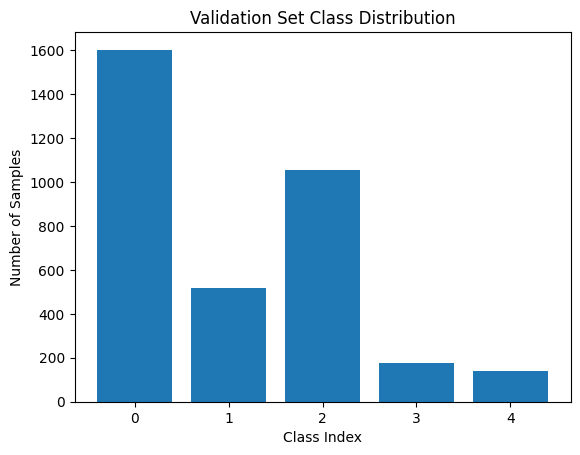

In [ ]:
# Check Class Distribution

import numpy as np
import matplotlib.pyplot as plt

# Count class distribution
ex_labels_val = val_gen.classes
class_counts = np.bincount(ex_labels_val)

# Plot distribution
plt.bar(range(len(class_counts)), class_counts)
plt.xlabel("Class Index")
plt.ylabel("Number of Samples")
plt.title("Validation Set Class Distribution")
plt.show()


### **Setup `ResNet101` Base Network**






In [ ]:
# Setup `ResNet101` Base Network

import tensorflow as tf
from tensorflow.keras.applications import ResNet101
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

base = ResNet101(weights='imagenet', include_top=False, input_shape=(IMG_H, IMG_W, 3))
base.trainable = False          # freeze layers

x = base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(5, activation='softmax')(x)

ResNet101_model_512 = models.Model(inputs=base.input, outputs=predictions)

# Use mixed precision optimizer
optimizer = optimizers.Adam(learning_rate=1e-4)  # Adjusted for mixed precision

ResNet101_model_512.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

171446536/171446536 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_2_image44C.png)

### **Train Neural Network**

In [ ]:
# Train Neural Network
import time
import tensorflow as tf

# Set number of epochs
EPOCHS=20

# Set Patience
PATIENCE=5

# ------------------------------------------------------------------------
# 1️⃣  Start training
# ------------------------------------------------------------------------
print(f"-- Training (classification) is starting for {EPOCHS} epochs----------------------------")
start_time = time.time()

# Add more optimization parameters
history_512 = ResNet101_model_512.fit(
    train_gen,
    epochs=EPOCHS,
    validation_data=val_gen,
    steps_per_epoch=len(train_gen),
    validation_steps=len(val_gen),
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=PATIENCE, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-7)
    ],
)

# Record end time
elapsed_time = time.time() - start_time

# Print elapsed time
print(f"Elapsed time: {hms_string(elapsed_time)}")

-- Training (classification) is starting for 20 epochs----------------------------


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 893s 4s/step - accuracy: 0.4097 - loss: 1.5204 - val_accuracy: 0.5272 - val_loss: 1.1584 - learning_rate: 1.0000e-04
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 852s 4s/step - accuracy: 0.5075 - loss: 1.1979 - val_accuracy: 0.5381 - val_loss: 1.1220 - learning_rate: 1.0000e-04
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 848s 4s/step - accuracy: 0.5231 - loss: 1.1535 - val_accuracy: 0.5456 - val_loss: 1.0998 - learning_rate: 1.0000e-04
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 851s 4s/step - accuracy: 0.5341 - loss: 1.1314 - val_accuracy: 0.5481 - val_loss: 1.0865 - learning_rate: 1.0000e-04
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 851s 4s/step - accuracy: 0.5425 - loss: 1.1050 - val_accuracy: 0.5544 - val_loss: 1.0819 - learning_rate: 1.0000e-04
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 852s 4s/step - accuracy: 0.5441 - loss: 1.0907 - val_accuracy: 0.5493 - val_loss: 1.0722 - learning_rate: 1.0000e-04
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 851s 4s/step - acc

### **Plot Training History**

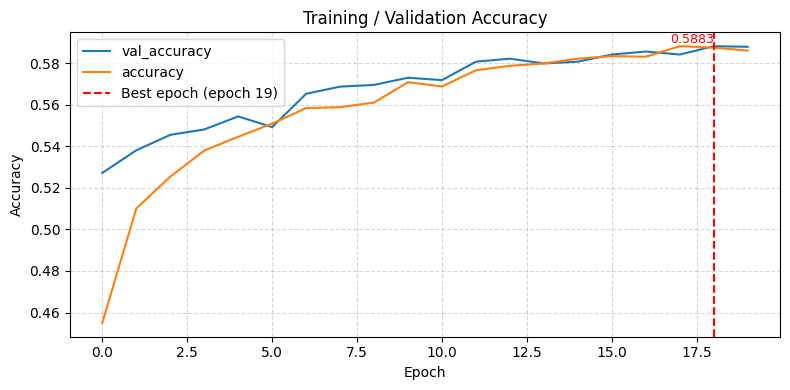

In [ ]:
# Plot Training History

import numpy as np
import matplotlib.pyplot as plt

# Pull the metrics
ex_val_acc = history_512.history.get('val_accuracy')
ex_train_acc = history_512.history.get('accuracy')

# --- Find the epoch with the highest validation accuracy -------------
# np.argmax returns the index (0‑based). Add 1 if you want to show it as "epoch 1, 2, …"
best_epoch_idx = np.argmax(ex_val_acc)       # 0‑based index
best_epoch_num = best_epoch_idx + 1          # 1‑based for display

# -----------------------------------------------------------------------

plt.figure(figsize=(8, 4))
plt.plot(ex_val_acc, label='val_accuracy')
plt.plot(ex_train_acc, label='accuracy')

# Vertical line at the best epoch (0‑based index)
plt.axvline(best_epoch_idx, color='r', linestyle='--',
            label=f'Best epoch (epoch {best_epoch_num})')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training / Validation Accuracy')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Optional: annotate the exact accuracy value at the best epoch
best_ex_val_acc = ex_val_acc[best_epoch_idx]
plt.text(best_epoch_idx, best_ex_val_acc,
         f'{best_ex_val_acc:.4f}',
         va='bottom', ha='right', color='r', fontsize=9)

plt.tight_layout()
plt.show()

### **Save Model to GDrive**

In [ ]:
# Save Model to GDrive
import os
import shutil
import tensorflow as tf

# --------------------------------------------------------------
# 1️⃣  Mount Google Drive (do this only once per session)
# --------------------------------------------------------------
# from google.colab import drive
# drive.mount('/content/drive')

# --------------------------------------------------------------
# 2️⃣  Define the names / paths
# --------------------------------------------------------------
model_name     = "ResNet101_model_512"                    # model object name
gdrive_dir     = f"/content/drive/My Drive/{model_name}"  # folder on Drive
gdrive_file    = f"{gdrive_dir}.keras"                    # the file we want to keep

local_dir      = f"/content/{model_name}"                 # the *local* folder you want to delete
local_file     = f"{local_dir}.keras"                     # if you saved a single file locally

# --------------------------------------------------------------
# 3️⃣  Make sure the Drive folder exists
# --------------------------------------------------------------
os.makedirs(gdrive_dir, exist_ok=True)

# --------------------------------------------------------------
# 4️⃣  Save the model *on* Drive (kept forever)
# --------------------------------------------------------------
ResNet101_model_512.save(gdrive_file)   # <-- this writes the file into /content/drive/My Drive/

# --------------------------------------------------------------
# 5️⃣  OPTIONAL: Verify the Drive copy exists
# --------------------------------------------------------------
print("Drive copy present:", os.path.exists(gdrive_file))
!ls ./drive/MyDrive

NameError: name 'ResNet101_model_512' is not defined

## **The Diabetic Retinopathy Dataset**

The **Diabetic Retinopathy Dataset** used in this lesson was part of a 2015 Kaggle Competition.

Here is a summary of the winners and what they did to win this competition.

### Winner of the 2015 Kaggle Diabetic Retinopathy Detection competition
**Team**: *o_O* (Mathis Antony & Stephan Brüggemann)  
**Score**: 0.845 weighted quadratic‑weighted Kappa (private leaderboard)  
**Public leaderboard**: 7th place (5.8 k K‑appa)

| Item | Details | Source |
|------|---------|--------|
| **Winning team** | “o_O” (Mathis Antony & Stephan Brüggemann) | 5.8 k K‑appa on the private leaderboard, 7 th place on the public leaderboard【9†L18-L23】 |
| **Overall performance** | 0.845 weighted quadratic weighted Kappa (private leaderboard) | 5.8 k K‑appa, 0.845 score【9†L19-L22】 |
| **Core architecture** | Two custom 2‑D convolutional nets (Net A & Net B) with a **per‑patient blending network** (Table 2) | 13‑25 | 12‑15 |
| **Training framework** | Lasagne + nolearn (Theano) | 10‑11 |
| **Image size** | 128 × 128, 256 × 256 and 512 × 512 (large color images, cropped to remove background) | 21‑24 |
| **Pre‑training strategy** | *First* train a small network on 128‑pixel images.  Weights are then used to initialise an intermediate‑size network (trained on 256 px) and finally a 512‑pixel network.  Orthogonal initialization for all weights. | 105‑108 |
| **Data augmentation** | Translation, stretching, rotation, flipping, colour jitter; per‑channel zero‑mean/unit‑variance scaling; 112/224/448 output sizes for 128/256/512 input images. | 115‑121 |
| **Class imbalance handling** | Dynamic resampling: oversample rare classes initially, then gradually reduce; resampling weights \((1.36, 14.4, 6.64, 40.2, 49.6)\) → \((1,2,2,2,2)\). | 82‑96 |
| **Training schedule** | Nesterov momentum with a fixed learning‑rate schedule over 250 epochs; learning rates 0.003 (epoch 0) → 0.00003 (epoch 150); L2 weight decay 0.0005; dropout after convolution and dense layers. | 31‑36, 70‑73 |
| **Loss & objective** | Mean‑squared‑error regression (output thresholded at (0.5,1.5,2.5,3.5) to obtain integer grades). | 75‑77 |
| **Blending network** | Input: mean & std of the RMSPool layer over 50 augmentations for each eye (µ,σ) + eye‑side indicator; 8193‑input → Dense 32 → Maxout 16 → Dense 32 → Maxout 16; Adam optimiser with a schedule (5 e‑4 → 5 e‑7). | 148‑156, 158‑166 |
| **Final ensemble** | Average of the two conv‑net predictions, blended with the patient‑level network; score 0.845 (private) vs 0.824 (no per‑patient blend). | 167‑169 |
| **Key design choices that yielded the win** | 1. **Large input resolution** – 512 × 512 (and even 768 × 768 for 0.81 Kappa) to capture micro‑aneurysms. 2. **Stage‑wise pre‑training** – starting from 128 px to 512 px to stabilise training. 3. **Extensive data augmentation & per‑channel normalisation**. 4. **Dynamic resampling** to address class imbalance without a weighted loss. 5. **Per‑patient blending** that aggregates information from both eyes and multiple augmentations. 6. **Ensembling of two independently trained nets**. | 45‑69, 82‑96, 100‑108, 115‑121, 131‑139, 167‑169 |

### **Why their approach won**

The combination of **large‑resolution images**, staged pre‑training, aggressive augmentation, careful imbalance handling, and per‑patient feature blending allowed the o_O model to achieve the highest weighted quadratic‑weighted κ score in the 2015 competition.

